# Bayesian Posterior Inference

## Learning Objectives

After this lecture, students will be able to:

1. describe the difference between frequentist and bayesian inference

2. describe the use of bayesian inference

3. calculate conditional probability using Bayes' Rule

4. derive posterior distribution

5. perform hypothesis testing using Bayesian inference

## Overview

In this lecture, we explore another paradigm of statistical inference called "Bayesian." While the frequentist paradigm forms the inference by applying only the properties of the dataset, the Bayesian allows additional information to be integrated into the consideration. 

We start this lecture by discussing the Bayes' Rule, which is the fundamental concept for Bayesian inference. Then, we demonstrate how to apply the Bayes' Rule to form the Bayesian inference with an example with a finite and discrete space. After that, we generalize the concept to cover the case of infinite and continuous space.

From the infinite and continuous example, we will see that most of the times we cannot construct the Bayesian inference due to the integration problem for the normalization factor. We can only analytically solve for the Bayesian inference with a specific case that carefully chooses a functional form as we call "conjugate prior." One example of the conjugate prior, and the analytic Bayesian inference, is discussed.

Then, we discuss how to apply a powerful computational algorithm called Markov Chain Monte Carlo (MCMC) to construct the Bayesian inference. Bayesian/MCMC pseudocode is discussed. A code example of Bayesian/MCMC is provided. Last, we demonstrate how to perform hypothesis testing using Bayesian inference.

## Prerequisites

This lecture assume students to be familiar with concepts of total probability, marginal probability, joint probability, and conditional probability. Knowledge about normal distribution and how to integrate a gaussian function is necessary when discussing the infinite and continuous Bayesian inference. Knowledge about python programming is required to understand the Bayesian/MCMC code.

## Bayes' Rule

$$
P(A|B) = \frac{P(A \cap B)}{P(B)}
$$

Bayes' Rule, as shown above, explains how the probability of observing an event A is updated by additional information B. For example, we have two boxes with balls. Box X has 8 red, and 2 white. The other Box Y has 5 red, and 5 white balls. We randomly pick one ball from an unknown box, and see it is a red. Then, we ask how much probability that we drew the red ball from Box X, i.e., P(X|red). 

Before the draw, we have 0.5 chance for drawing from any box, i.e., P(X) = P(Y) = 0.5. Once we draw a red, this probability changes. By intuition, we know that P(X|red) > 0.5 and P(Y|red) < 0.5 with 1 = P(X|red) + P(Y|red). And, if we think a bit deeper, we know that P(X|red) = 8/13 and P(Y|red) = 5/13, because we apply the only information we have (which is drawing a red ball) to form this probability. To be more precise, we know that we have 13 red balls in total: 8 balls in Box X and 5 balls in Box Y. This is exactly how Bayes' Rule works.

To be mathematically precise, we will try to derive the result by using the Bayes' Rule. We start with writing the rule out

$$
P(X|red) = \frac{P(X \cap red)}{P(red)}
$$

It would a lot easier if we were asked to find P(red|X), because we know P(red|X) = 8/10. Well, we can actually start from here because Bayes' Rule can also be expressed as

$$
P(A \cap B) = P(A|B)P(B) = P(B|A)P(A)
$$

This identity is a direct result from the symmetry of a joint probability, i.e., $P(A \cap B) = P(B \cap A)$. So, we can find $P(X|red) = P(red|X)P(X) / P(red) = 0.8 \times 0.5 / (13/20) = 8/13$. Walla! (Note that this calculation looks simple also because P(X) = P(Y), which will be relaxed in a later example). This Bayes' trick, as we would call, is the ground for understanding the Bayesian inference in this lecture. To summarize the Bayes' trick

$$
P(A|B) = \frac{P(B|A)P(A)}{P(B)}
$$

## Likelihood, Prior, Posterior, and Normalization

In this section, we introduce four technical names used in Bayesian inference. Associated with the previous example about boxes and balls, we would like to know the updated probability P(X|red) given additional information drawing red. Also, recall the Bayes' trick formula. We call the four terms in the Bayes' trick: likelihood, prior, posterior, and normalization.

Posterior, as the name implied, is the updated probability P(X|red) that we would like to know after integrating additional information (drawing red) into consideration. Prior is the initial probability before acquiring additional information, i.e., P(X) = 0.5. Likelihood P(red|X) connects how the additional information provides the benefits of knowledge. And, the normalization at the denominator P(B), we can think of it as to normalize the scale back to the probability to be unity, i.e.,
$\sum_{\forall i} P(A_i | B) = 1$.

# Normalization: The Nuisance Parameter

Typically, we adopt Bayesian approach when we have $A$ as the result of our interests, while $B$ as the information we have. Becasue of this, the posterior would be affected mainly by the two terms associated with $A$: the likelihood and prior. We can consider the normalization as a constant, that calibrates the total posterior to be unity as required in the probability scale. However, this constant is the nuisance parameter that is not actually in our interests, but can prevent us from finding an analytic solution of the problem in a simple manner.

To show this, we get back to the previous boxes and balls example. In the previous setting of the example, we can calculate the posterior easily because $P(X) = P(Y) = 0.5$, which makes the normalization $P(red) = \frac{13}{20}$ as the number of reds in X divided by the total of reds.

Let's consider a new situation. The process starts with a box either X or Y randomly chosen with $P(X) = 0.3$. We do not know exactly which box was chosen, but we know the probability $P(X)$. We draw one ball from the chosen box to see its color (let's make it red again), and want to know $P(X|red)$.

It is straightforwardly the same as the previous example that the likelihood $P(red|X) = 0.8$ and the prior $P(X) = 0.3$, but in the new example $P(red) \neq \frac{13}{20}$. To understand this, we invoke the total probability identity

$$
P(\alpha) = \sum_{\forall i} P(\alpha | \beta_i) P(\beta_i)
$$

The meaning of the expression is that the total probability of observing the event $\alpha$ is composed of each individual probability of observing the event given a condition $\beta_i$, $P(\alpha | \beta_i)$. And, we sum each individual probability because they are mutually exclusive. 

To make it in the context of our new example, 

$$
P(red) = P(red | X) P(X) + P(red | Y) P(Y) = 0.8 \times 0.3 + 0.5 \times 0.7 = 0.59
$$

Therefore, $P(X | red) = 0.41$.

Note that, we still can compute the numerical result of this new example becasue of the simplicity of finite discrete conditions $\beta_i$. In general, if the condition is continuous in an interval [a,b] (which can be infinity),

$$
P(\alpha) = \int_{a}^{b} P(\alpha | \beta) P(\beta) d\beta
$$

It is because of this integration, in a complex situation we typically cannot find a closed form of this integration, which prevents us from finding the solution.

# Analytic Posterior by Choosing Conjugate Prior

There is a way to find an analytic Bayesian solution by selecting the likelihood and prior functional forms that can be integrated analytically. Since the likelihood generally comes from underlying models or theories, this leaves us only the freedom to choose a suitable prior, which is called "conjugate prior" of the likelihood. 

In this section, we will go through one example of the conjugate prior. Let's say we know that a continuous random variable $x$ (extending to infinity) is identically and independently drawn from a $x \sim N(\theta,\sigma^2)$ such that $\theta$ is unknown but $\sigma$ is known. Our intention is to observe one $x = X$, and characterize the posterior $P(\theta | X)$.

Recall the normal distribution. For this example, we can express the likelihood as

$$
P(X | \theta) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left[-\frac{(x - \theta)^2}{2 \sigma^2} \right]
$$

In this example, our only unknown is $\theta$. We would like to select a conjugate prior $P(\theta)$ that will give us $\int_{-\infty}^{\infty} P(X | \theta) P(\theta) d\theta$ integrable. One possible conjugate is alsoa gaussian function itself. To show this, we choose the prior $P(\theta)$ such that $\theta \sim N(\mu_0,\sigma_{0}^2)$. (Note that both $\mu_0$ and $\sigma_{0}$ are known because this is prior). This will be left as an exercise to show that

$$
P(X | \theta) P(\theta) = \exp \left[ -\frac{(\theta - \mu_1)^2}{2 \sigma_{1}^2} \right]
$$

By applying $\int_{-\infty}^{\infty} \exp[ -x^2 ] dx = \sqrt{\pi}$, we get $\int_{-\infty}^{\infty} P(X | \theta) P(\theta) d\theta = \sqrt{2 \pi \sigma_{1}^2}$. Therefore, the posterior $P(\theta | X)$ is also a normal distribution with mean $\mu_1$ and variance $\sigma_{1}^2$ where

$$
\mu_1 = \sigma_{1}^2 \left( \frac{X}{\sigma^2} + \frac{\mu_0}{\sigma_{0}^2} \right)
$$

$$
\sigma_{1}^2 = \left( \frac{1}{\sigma^2} + \frac{1}{\sigma_{0}^2} \right)^{-1}
$$

# Bayesian Posterior by Markov Chain Monte Carlo

As we can see from the previous section that it is not always possible to find an analytic Bayesian posterior if we cannot find a conjugate prior of a given likelihood. Moreover, in practice we most likely prefer a certain functional form or property of prior regarding to other information such as theories or results from previous research. Therefore, we actually do not have much of the freedom to choose any prior, and the Bayesian posterior cannot be expressed in a closed form.

Fortunately, the Markov Chain Monte Carlo (MCMC) simulation is a method that can help us computationally characterize the posterior. Without getting into details, the pseudocode for the Bayesian/MCMC is as following:

0. Collect the data $X$

1. Set up a prior $P(\theta)$, and likelihood $P(X|\theta)$.

2. Initialize the parameter $\theta = \theta_0$.

3. Propose a new $\theta = \theta_1$ with a given rule $q(\theta_1 | \theta_0)$ (which will be discussed later)

4. Compute $$
\alpha = \frac{P(X|\theta_1)P(\theta_1) / q(\theta_1 | \theta_0)}{P(X|\theta_0)P(\theta_0) / q(\theta_0 | \theta_1)}
$$

5. Determine whether to accept $\theta_1$ with the acceptance rate $\alpha$

6. If accept, record $\theta_1$ and set $\theta_0 = \theta_1$. If not, record $\theta_0$ and leave $\theta_0 = \theta_0$

7. Repeat steps 3 -- 6 until we get a satisfied result (which will be discussed later)

8. Discard some early iterations before the convergence of $\theta$ (which will be discussed later)

9. The leftover array of $\theta$ represents the posterior, which can be visualized by a histogram

Note: step 3 -- 6 is called "Metropolis-Hastings" algorithm, which is a MCMC random sampling algorithm for one unknown posterior parameter. If the problem has more than one unknown posterior parameters, a better MCMC sampling algorithm than the Metropolis is called "Gibbs sampling."

## Rule for proposing a new  position $q(\theta_1 | \theta_0)$

This step is the core of MCMC. The idea of MCMC is to perform a random move to a new position from the current position. In our case, the current position is $\theta_0$, and we want to move to a new position $\theta_1$. There are several ways to determine where to move as long as the move is random with a given rule $q(\theta_1 | \theta_0)$. For example, we might propose the move with a distance $\epsilon \sim N(0,1)$ such that $\theta_1 = \theta_0 + \epsilon$. Therefore, $q(\theta_1 | \theta_0) \sim N(\theta_0,1)$ in this case. 

Since a new position is practically drawn from a symmetric function such that $q(\theta_1 | \theta_0) = q(\theta_0 | \theta_1)$ (e.g., the normal distribution), the two $q$ terms in the $\alpha$ are cancelled out. Therefore, the acceptance rate $\alpha$ is the odd ratio between the posterior probability at the new position relative to at the current one, which is more intuitive than when having to consider the two $q$ terms. In the following discussion, we will apply a symmetric rule so that we can discard the impacts of $q$ safely. However, it is worth to keep in mind that the $q$ terms must be taken into account when the symmetry is broken. Intuitively, the term $q$ makes the probability like $P(X|\theta_1)P(\theta_1) / q(\theta_1 | \theta_0)$ represent an effective probability of the posterior probability. 

## When to stop the iteration?

MCMC is an iterative simulation, therefore we have to know when to stop. In this case, let's imagine that the initial $\theta_0$ is a value which is very far away from the "perfect" $\theta$. In each iteration, $\theta$ should effectively move closer to the perfect value. Then, $\theta$ will converge to the perfect value, but fluctuate slightly around due to the random walk in each iteration. 

As mentioned in step 8, we discard some early iteration before the convergence of $\theta$. There are no best method to determine when the Markov Chain converges. Typically, the chain plot, and potential scale reduction factor (a.k.a. PSRF) are computed to determine the likelihood of having a converge chain. In the following example, only the chain plot will be introduced.

After, we identify when the chain starts to converge, we continue the iteration and keep recording all the $\theta$s afterwards. The more iterations we run after the convergence, the better estimate of the posterior is. Therefore, we actually stop when we think that the computed posterior would be accurate enough for the analysis.

# Code Example of Bayesian/MCMC

In this section, a simple Bayesian/MCMC code is presented. We are trying to solve the same problem as presented with the normal-distributed likelihood and normal-distributed conjugate prior, so that we can compare the final result with the analytic solution. Note also that we consider only the case of having only one observation, and we work with a log scale to prevent the computational crash due to a very large/small number due to the exponential function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(1234) # set the random state

def log_gauss(x, mu, sig):
    a = np.sqrt(2 * 3.14 * sig**2)
    b = -1. * (x - mu)**2 / (2. * sig**2)
    return b - np.log(a)

def rule_newPosition(mu,sig):
    return np.random.normal(mu,sig)

def post_params(x, sigma, mu0, sigma0):
    sigma1 = np.sqrt((sigma**-2 + sigma0**-2)**-1)
    mu1 = (sigma1**2) * (x/sigma**2 + mu0/sigma0**2)
    return (mu1,sigma1)

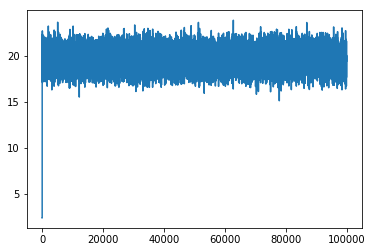

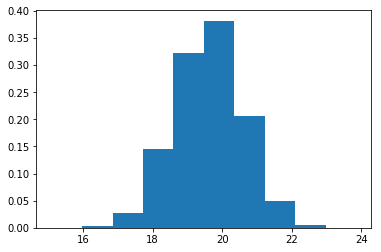

Result from the simulation:
count    99000.000000
mean        19.617536
std          0.982833
min         15.096871
25%         18.947265
50%         19.625415
75%         20.289686
max         23.851541
dtype: float64

Analytic $\mu_1$ = 19.615, $\sigma_1$ = 0.981


In [2]:
record = [] # for recording
iter = 100000 # number of iterations

# 0. Collect the data $X$
X = 10.

# 1. Set up a prior $P(\theta)$, and likelihood $P(X|\theta)$.
theta0,sigma = None,5. # likelihood
mu0,sigma0 = 20.,1. # prior

# 2. Initialize the parameter $\theta = \theta_0$.
theta0 = 0.

for i in np.arange(iter):
    # 3. Propose a new $\theta = \theta_1$ with a given rule $q(\theta_1 | \theta_0)$ (which will be discussed later)
    theta1 = theta0 + rule_newPosition(0.,5.)

    # 4. Compute $$
    # \alpha = \frac{P(X|\theta_1)P(\theta_1) / q(\theta_1 | \theta_0)}{P(X|\theta_0)P(\theta_0) / q(\theta_0 | \theta_1)}
    # $$
    a = log_gauss(X,theta1,sigma) + log_gauss(theta1,mu0,sigma0)
    b = log_gauss(X,theta0,sigma) + log_gauss(theta0,mu0,sigma0)
    log_alpha = a - b
    alpha = np.exp(log_alpha)

    # 5. Determine whether to accept $\theta_1$ with the acceptance rate $\alpha$
    c = np.random.uniform()
    if c < alpha:
        accept = True
    else:
        accept = False

    # 6. If accept, record $\theta_1$ and set $\theta_0 = \theta_1$. If not, record $\theta_0$ and leave $\theta_0 = \theta_0$
    if accept:
        theta0 = theta1
    record.append(theta0)

    # 7. Repeat steps 3 -- 6 until we get a satisfied result (which will be discussed later)

# 8. Discard some early iterations before the convergence of $\theta$ (which will be discussed later)
plt.figure()
plt.plot(record)
plt.show()
record = record[1000:]

# 9. The leftover array of $\theta$ represents the posterior, which can be visualized by a histogram
plt.figure()
plt.hist(record,density=True)
plt.show()

print('Result from the simulation:')
print(pd.Series(record).describe())

a = post_params(X,sigma,mu0,sigma0)
print('\nAnalytic $\mu_1$ = {0:.3f}, $\sigma_1$ = {1:.3f}'.format(a[0],a[1]))

As we can see, the first plot is the chain plot showing some early moves that were trying to converge to the solution, and we discarded that section as shown in step 8. Also, the final result from the simulation (mean, std) is approximately the same as we expect from the analytic solution ($\mu_1$, $\sigma_1$).

# Hypothesis Testing

In this last section, we discuss how to perform a hypothesis testing using Bayesian inference. We continue this discussion with by simulated result of recorded $\theta$ from the previous section.

We start with setting up a hypothesis. Let's say, we would like to know whether $\theta$ is indifference to 19.
$$
H_0: \theta = 19
$$
$$
H_1: \theta \neq 19
$$

Next, since we already have the distribution (i.e., the histogram), we can proceed by choosing the significance level. Let's take the significance level $\alpha = 0.05$.

Then, we can either proceed by constructing a confidence interval (CI) around the recorded mean {{'{0:.3f}'.format(pd.Series(record).mean())}}, or find the critical values to contruct the rejection regions. We continue with constructing the rejection regions, which is less complicated than the other method.

Since our hypothesis is 2-tailed, we would like to find the critical values on the left and right ($\theta_{crit,L},\theta_{crit,R})$ that makes $P(\theta \leq \theta_{crit,L}) = P(\theta > \theta_{crit,R}) = 0.025$, where we will reject the null hypothesis if 19 is inside these regions. We find the values by using the function describe() in pandas.

In [3]:
pd.Series(record).describe(percentiles=[0.025,1-0.025])

count    99000.000000
mean        19.617536
std          0.982833
min         15.096871
2.5%        17.688489
50%         19.625415
97.5%       21.511654
max         23.851541
dtype: float64

Therefore, we have $\theta_{crit,L} = 17.69$ and $\theta_{crit,R} = 21.51$. Since 19 is not inside the rejection regions, we conclude that "we fail to reject the null hypothesis at 0.05 significance level."

# Summary

We discuss the Bayesian posterior inference in this lecture. The Bayesian inference is different to the frequentist one in particularly that the Bayesian inference allows extra information, other than the properties of the sample, to be integrated as the prior when forming the posterior. The extra information is assumed to be dependent to the event of interests connected by the likelihood. 

To construct the Bayesian posterior inference, three components are required: likelihood, prior, and normalization. Even though the normalization does not directly affect the posterior, this component is necessary in order to completely construct the inference. However, because the term involves with an integration, only a carefully chosen conjugate prior can result in a closed-form analytic solution. In general, the term cannot be integrated, and Bayesian/MCMC is the computational method that helps us constructing the inference computationally. The pseudocode, and a code example of Bayesian/MCMC.